In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [2]:
# Define base paths
data_dir = "../../data/loaded"
Images_dir = "../../images/EDA_1"
elevation_file_path = os.path.join(data_dir, "elevation.csv")

In [3]:
elev_df = pd.read_csv(elevation_file_path)
elev_df.head()

,longitude,latitude,elevation
0,8.939444,37.539444,0
1,8.943611,37.539444,1
2,8.947778,37.539444,0
3,8.935278,37.535278,0
4,8.939444,37.535278,0


# General inspection

In [4]:
print("shape:", elev_df.shape)
print("columns:", elev_df.columns.tolist())
print("missing values:\n", elev_df.isnull().sum())

shape: (13167778, 3)
columns: ['longitude', 'latitude', 'elevation']
missing values:
 longitude    0
latitude     0
elevation    0
dtype: int64


In [5]:
elev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13167778 entries, 0 to 13167777
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   longitude  float64
 1   latitude   float64
 2   elevation  int64  
dtypes: float64(2), int64(1)
memory usage: 301.4 MB


In [6]:
elev_df.describe()

,longitude,latitude,elevation
count,1.316778e+07,1.316778e+07,1.316778e+07
mean,3.107361e+00,2.856316e+01,5.385578e+02
std,4.543747e+00,4.405605e+00,3.242090e+02
min,-8.673056e+00,1.896028e+01,-8.720000e+02
25%,-1.063889e-01,2.509361e+01,3.120000e+02
50%,3.489444e+00,2.841028e+01,4.650000e+02
75%,6.764444e+00,3.209361e+01,6.980000e+02
max,1.197694e+01,3.753944e+01,2.877000e+03


In [7]:
# check duplicates pairs of latitude and longitude
duplicates = elev_df.duplicated(subset=['latitude', 'longitude']).sum()
print(f"Number of duplicate latitude-longitude pairs: {duplicates}")

Number of duplicate latitude-longitude pairs: 0


## Univariate Analysis

In [8]:
print("number of unique elevation values:", elev_df['elevation'].nunique())

number of unique elevation values: 2627


In [9]:
# choose number of bins using Sturges' formula
num_bins = 1 + (10/3) * np.log10(elev_df.shape[0])
num_bins = int(num_bins)
print(f"Number of bins for elevation histogram: {num_bins}")

Number of bins for elevation histogram: 24


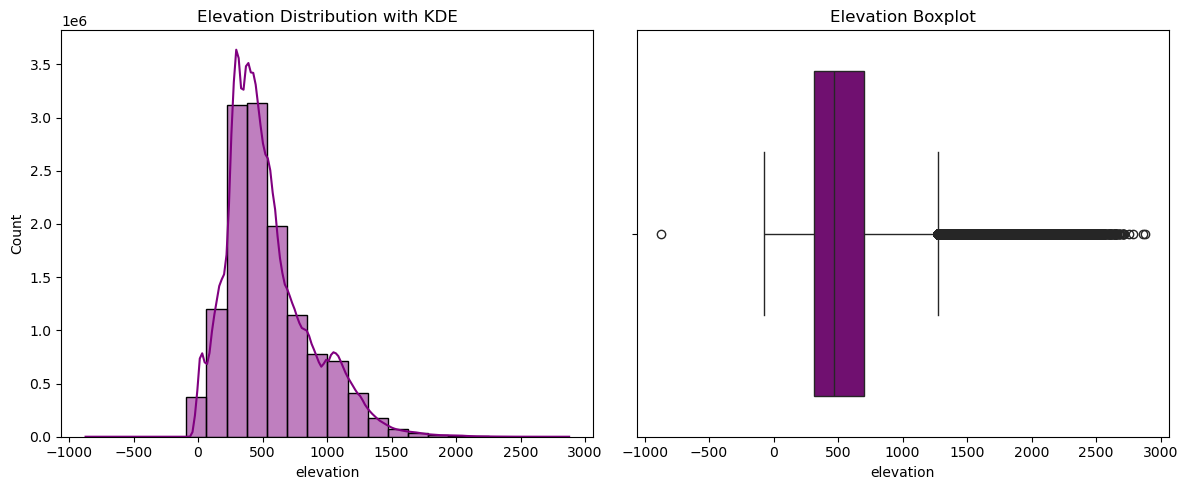

In [12]:
# plot distribution of elevation (histogram with kde and boxplot in same row)
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(elev_df['elevation'], bins=num_bins, kde=True, ax=ax[0], color='purple')
ax[0].set_title('Elevation Distribution with KDE')
sns.boxplot(x=elev_df['elevation'], ax=ax[1], color='purple')
ax[1].set_title('Elevation Boxplot')
plt.tight_layout()
plt.savefig(os.path.join(Images_dir, "elevation_distribution.png"))
plt.show()

In [16]:
# number of outliers using IQR method
Q1 = elev_df['elevation'].quantile(0.25)
Q3 = elev_df['elevation'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = elev_df[(elev_df['elevation'] < lower_bound) | (elev_df['elevation'] > upper_bound)]
print(f"Number of outliers in elevation data: {outliers.shape[0]}")
print(f"percentage of outliers: {outliers.shape[0] / elev_df.shape[0] * 100:.2f}%")
print(f"number and percentage of high outliers: {outliers[outliers['elevation'] > upper_bound].shape[0]} ({outliers[outliers['elevation'] > upper_bound].shape[0] / elev_df.shape[0] * 100:.2f}%)")
print(f"number and percentage of low outliers: {outliers[outliers['elevation'] < lower_bound].shape[0]} ({outliers[outliers['elevation'] < lower_bound].shape[0] / elev_df.shape[0] * 100:.2f}%)")

Number of outliers in elevation data: 382492
percentage of outliers: 2.90%
number and percentage of high outliers: 382491 (2.90%)
number and percentage of low outliers: 1 (0.00%)


In [17]:
# compare mean , median, mode
mean_elev = elev_df['elevation'].mean()
median_elev = elev_df['elevation'].median()
mode_elev = elev_df['elevation'].mode()[0]
print(f"Mean elevation: {mean_elev}")
print(f"Median elevation: {median_elev}")
print(f"Mode elevation: {mode_elev}")

Mean elevation: 538.5577575047209
Median elevation: 465.0
Mode elevation: 301


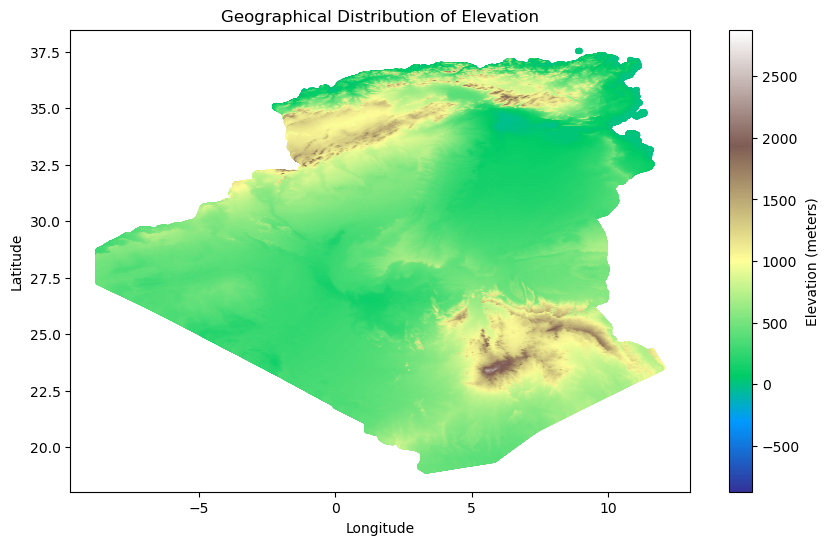

In [ ]:
# map 
plt.figure(figsize=(10, 6))
scatter = plt.scatter(elev_df['longitude'], elev_df['latitude'], c=elev_df['elevation'], cmap='terrain', s=10)
plt.colorbar(scatter, label='Elevation (meters)')
plt.title('Geographical Distribution of Elevation')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig(os.path.join(Images_dir, "elevation_map.png"))
plt.show()

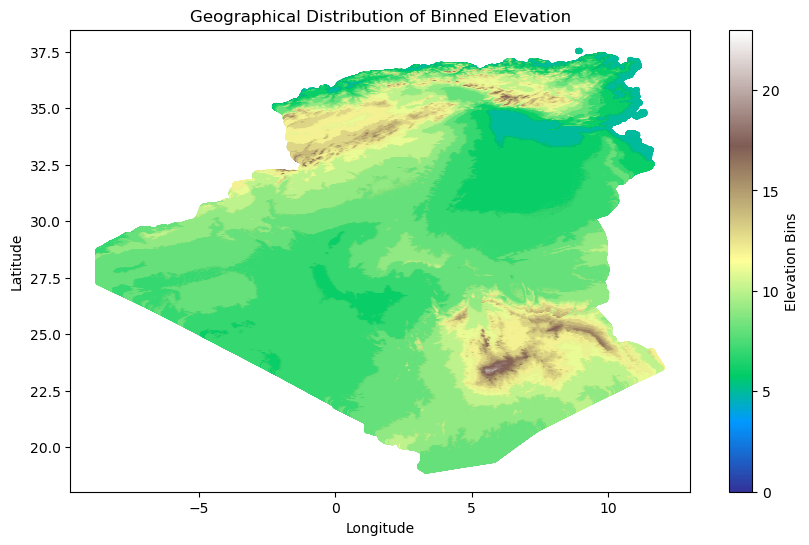

In [18]:
# map after binning elevation into 24 bins
elev_df['elevation_binned'] = pd.cut(elev_df['elevation'], bins=num_bins)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(elev_df['longitude'], elev_df['latitude'], c=elev_df
['elevation_binned'].cat.codes, cmap='terrain', s=10)
plt.colorbar(scatter, label='Elevation Bins')
plt.title('Geographical Distribution of Binned Elevation')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig(os.path.join(Images_dir, "elevation_binned_map.png"))
plt.show()

## Summary of Findings

The elevation dataset comprises **13,167,778 records** and **3 attributes**:
`longitude`, `latitude`, and `elevation`.

#### 1. Data Overview

* **Shape:** (13,167,778, 3)
* **Columns:** `longitude (float64)`, `latitude (float64)`, `elevation (int64)`
* **Missing Values:** None detected across all columns.
* **Duplicate Coordinates:** None — each latitude–longitude pair is unique.
* **Memory Usage:** Approximately **301.4 MB**.

#### 2. Distribution Analysis

A histogram of the elevation data was constructed using the **Sturges’ rule**, resulting in **24 bins**.

* The **distribution** exhibits a **slight right skew**, indicating a larger concentration of low to moderate elevation values with a gradual decline toward higher elevations.
* A **boxplot** confirmed the presence of **outliers**, predominantly in the higher elevation range.

#### 3. Outlier Analysis

* **Total number of outliers:** 382,492

  * **High outliers:** 382,491 (**2.90%**)
  * **Low outliers:** 1 (**0.00%**)
* These outliers correspond mainly to **exceptionally high elevation points**, representing mountainous regions.

#### 4. Descriptive Statistics

| Metric               |    Value | Interpretation                                                                        |
| :------------------- | -------: | :------------------------------------------------------------------------------------ |
| **Mean elevation**   | 538.56 m | Higher than the median, supporting the right-skewed distribution.                     |
| **Median elevation** |  465.0 m | Central tendency lower than the mean, consistent with positive skewness.              |
| **Mode elevation**   |    301 m | Most frequently occurring elevation, reflecting the prevalence of low-altitude areas. |

#### 5. Interpretation

The analysis confirms that the **elevation values are mildly right-skewed**, as evidenced by the relative positions of the mean, median, and mode.
The dataset shows **no missing or duplicate data**, ensuring strong spatial integrity.
The presence of a small proportion of high outliers highlights **natural topographic variation**, with most regions situated at **moderate elevations** and a limited number at **high altitudes**.
